In [36]:
import pymolzilla.processing as pm

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', size=8) #controls default text size
plt.rc('axes', titlesize=8) #fontsize of the title
plt.rc('axes', labelsize=8) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=8) #fontsize of the legend

In [37]:
f = pm.cofe_low_t()
f.df

,set,obj,wavelength,flags,sample_rotation,hext
0,0460,<pymolzilla.processing.file_import.SetRotmld o...,460,None,0,207
1,0530,<pymolzilla.processing.file_import.SetRotmld o...,530,None,0,207
2,0620,<pymolzilla.processing.file_import.SetRotmld o...,620,None,0,207
3,0710,<pymolzilla.processing.file_import.SetRotmld o...,710,None,0,207
4,0810,<pymolzilla.processing.file_import.SetRotmld o...,810,None,0,207
5,0920,<pymolzilla.processing.file_import.SetRotmld o...,920,None,0,207
6,1050,<pymolzilla.processing.file_import.SetRotmld o...,1050,None,0,207
7,1200,<pymolzilla.processing.file_import.SetRotmld o...,1200,None,0,207
8,1450,<pymolzilla.processing.file_import.SetRotmld o...,1450,None,0,207


loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
loading set: 6
loading set: 7
loading set: 8
loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
loading set: 6
loading set: 7
loading set: 8


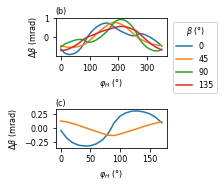

In [44]:
f.load()

g = f[2]

for gg in g:
    gg.preprocess(symmetrize_h = False)


g.collect_merge()

# kresleni
##########

fig, (ax, ax2) = plt.subplots(2,1, figsize=(3,2.5), constrained_layout=True)
phih = g.data['phih']

ax.plot(phih, g.data[0.], color='C0', label='0')
ax.plot(phih, g.data[45.], color='C1', label='45')
ax.plot(phih, g.data[90.], color='C2', label='90')
ax.plot(phih, g.data[135.], color='C3', label='135')

ax.legend(title=r'$\beta$ ($\degree$)', bbox_to_anchor=(1.02,1))
ax.set_xlabel(r'$\varphi_H$ ($\degree$)')
ax.set_ylabel(r'$\Delta\beta$ (mrad)')
ax.text(0, 1.1, "(b)", transform=ax.transAxes)

# druhy graf
######
f.load()
g = f[2]
for gg in g:
    gg.preprocess(symmetrize_h = True)
g.collect_merge()
g.fourier2_beta()

phih = g.data['phih']

ax2.plot(phih, g.data[0.], color='C0', label='0')
ax2.plot(phih, g.data[45.], color='C1', label='45')

ax2.set_xlabel(r'$\varphi_H$ ($\degree$)')
ax2.set_ylabel(r'$\Delta\beta$ (mrad)')
ax2.text(0, 1.1, "(c)", transform=ax2.transAxes)

fig.savefig('out/cofelt-data.pdf')